# Random Forest Regression

## Importing the libraries

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [74]:
dataset = pd.read_csv('/content/Sales forecast.csv')
testdata=  pd.read_csv('/content/testdata.csv')
dataset.head()

,StoreNum,ItemID,Sales,Units,Year
0,57,2,679064.37,12885,2016
1,57,1,1268409.60,23766,2016
2,57,5,94744.94,4205,2016
3,57,35,1446.67,87,2016
4,57,7,1475152.07,24952,2016


# Data Preprocessing

In [75]:
data=dataset[['ItemID','Year','Sales']]
data.head()
X = data.iloc[:,:-1].values

In [76]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
print(X[0])
y[0]

[   2 2016]


679064.37

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,1])],remainder='passthrough',sparse_threshold=0)
X=np.array(ct.fit_transform(X))


## Splitting the dataset into the Training set and Test set

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model 

In [79]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [82]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 1.24e+06  1.05e+06]
 [ 1.24e+06  1.05e+06]
 [ 3.47e+05  6.39e+05]
 [ 2.18e+06  2.25e+06]
 [ 1.25e+02  4.00e+01]
 [ 1.55e+06  1.27e+06]
 [ 3.38e+05  2.29e+05]
 [ 2.18e+06  2.21e+06]
 [ 1.44e+03  9.95e+02]
 [ 2.22e+06  3.66e+06]
 [ 3.47e+05  3.63e+05]
 [ 1.25e+02  2.40e+02]
 [ 3.09e+02  4.00e-02]
 [ 6.39e+04  5.05e+04]
 [ 6.39e+04  1.12e+05]
 [ 1.80e+06  1.28e+06]
 [ 1.25e+02  3.15e+02]
 [ 2.06e+06  1.78e+06]
 [ 3.38e+05  2.60e+05]
 [ 3.47e+05  2.96e+05]
 [ 3.47e+05  3.41e+05]
 [ 2.04e+02  2.38e+02]
 [ 2.06e+06  2.52e+06]
 [ 2.06e+06  2.25e+06]
 [ 3.47e+05  4.31e+05]
 [ 2.18e+06  1.42e+06]
 [ 1.19e+03  4.58e+02]
 [ 2.22e+06  1.17e+06]
 [ 1.86e+06  2.19e+06]
 [ 2.18e+06  1.01e+06]
 [ 1.24e+06  1.69e+06]
 [ 2.22e+05  2.10e+05]
 [ 3.47e+05  1.40e+05]
 [ 6.39e+04  9.00e+04]
 [ 3.16e+05  2.68e+05]
 [ 2.18e+06  3.82e+06]
 [ 1.18e+05  1.32e+05]
 [ 3.47e+05  2.40e+05]
 [ 1.43e+06  2.35e+06]
 [ 2.91e+05  2.03e+05]
 [ 1.44e+03  9.18e+02]
 [ 2.63e+05  2.20e+05]
 [ 3.09e+02  0.00e+00]
 [ 2.91e+05

## Evaluating the Model Performance

In [83]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
X_test

array([[0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

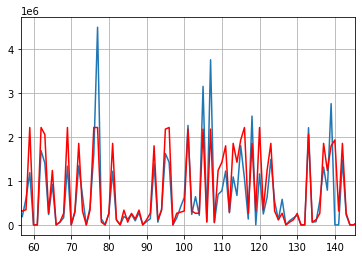

In [84]:
#plotting predicted Vs actual values of test dataset
fig, ax = plt.subplots()  
ax.plot(y_test)
ax.plot(y_pred, color='red')
    
ax.xaxis.zoom(3) 
   
ax.grid()

In [85]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 71.18 %
Standard Deviation: 4.98 %
